Akinde Kadjo

**Background:**

This dataset from [Kaggle](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset) contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. 

I will use hypothesis testing to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

# Imports and Data Loading

In [1]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#Loading the data from the url
insurance_url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv"
insurance = pd.read_csv(insurance_url, sep=',', low_memory=False)

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [5]:
#making a copy
df= insurance.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is  no missing data

In [7]:
#checking for duplicate 
df.duplicated().sum()

1

In [8]:
#dropping duplicates and checking again
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
#Identifying and addressing any inconsistencies in categorical values
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= sex
male      675
female    662
Name: sex, dtype: int64



- Column= smoker
no     1063
yes     274
Name: smoker, dtype: int64



- Column= region
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64





# Hypothesis Testing

## Do smokers have higher insurance charges than non-smokers?

**Null Hypothesis:** Smokers and non-smokers have the same insurance charges.

**Alternative Hypothesis:** Smokers and non-smokers have different insurance charges.

**Alpha:** We will be using an alpha= 0.05

In [10]:
#smoker df
smoker_df = df.loc[df['smoker']== 'yes']
smoker_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251


In [11]:
#non-smoker df
non_smoker_df = df.loc[df['smoker']== 'no']
non_smoker_df.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [12]:
print(f'The total number of smoker is: {len(smoker_df)}')
print(f'The total number of non-smoker is: {len(non_smoker_df)}')

The total number of smoker is: 274
The total number of non-smoker is: 1063


**Normality Assumption:** The overall number of data point is much higher than 20 so normality is assumed and therefore normality test will not be performed.

**Test choice:** The target column is numerical and we have to samples so a 2 sample T-Test will be performed. Also Smokers and non-smokers are independent from one another, so I will perform an independent t-test

In [13]:
#checking for outliers with z-scores > 3 for smokers
smoke = df['smoker']== 'yes'
zscores_s = stats.zscore(smoke)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [14]:
#checking for outliers with z-scores > 3 for non-smokers
no_smoke = df['smoker']== 'no'
zscores_ns = stats.zscore(no_smoke)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)

0

In [15]:
# Test for equal variance
Var_smoker_result = stats.levene(smoker_df['charges'], non_smoker_df['charges'])
stat, p = levene(smoker_df['charges'], non_smoker_df['charges'])
if p > 0.05: 
    print(f'Both groups have equal variance')
else:
    print(f'Both groups do not have equal variance')
print(Var_smoker_result)

Both groups do not have equal variance
LeveneResult(statistic=332.47137394800666, pvalue=1.670117565125241e-66)


**Variance:** Since both groups do not have the same variance, the T-Test will be performed with equal variance set to false

In [16]:
# Independent t-test with equal_var set to False
smoker_result = stats.ttest_ind(smoker_df['charges'], non_smoker_df['charges'], equal_var = False)
stat, p = stats.ttest_ind(smoker_df['charges'], non_smoker_df['charges'])
if p > 0.05: 
    print(f'Smokers and non-smokers have the same insurance charges')
else:
    print(f'Smokers and non-smokers have different insurance charges')
print(smoker_result) 

Smokers and non-smokers have different insurance charges
Ttest_indResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103)


**Conclusion:** The resulting p-value is much less than the alpha value, so the null hypothesis is rejected. We can conclude that Smokers and non-smokers have different insurance charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

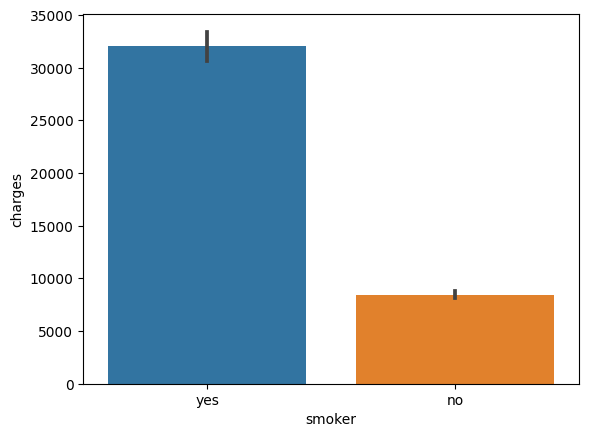

In [17]:
#The following graph confirms that smokers have higher insurance charges than non-smokers
sns.barplot(data=df, x='smoker', y='charges')

## Are men more likely to smoke than women?

**Null Hypothesis:** Men and Women have the same likelihood of smoking.

**Alternative Hypothesis:** Men are more likely to smoke than women.

**Alpha:** We will be using an alpha= 0.05

**Normality Assumption:** The overall number of data point is much higher than 20 so normality is assumed and therefore normality test will not be performed.

**Test choice:** The target column is Categorical and we have 2 samples. The samples are not tested against known target, so I will perform the Chi-Squared Test for this case.

In [18]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [19]:
#run the chi test
chi2, p, deg_free, expected_vals = stats.chi2_contingency(table)
if p > 0.05: 
    print(f'Men and Women have the same likelihood of smoking')
else:
    print(f'Men are more likely to smoke than women')
print(p)

Men are more likely to smoke than women
0.0062765550120107375


**Conclusion:** The resulting p-value is much less than the alpha value, so the null hypothesis is rejected. We can conclude that Men are more likely to smoke than women

<AxesSubplot:xlabel='sex', ylabel='count'>

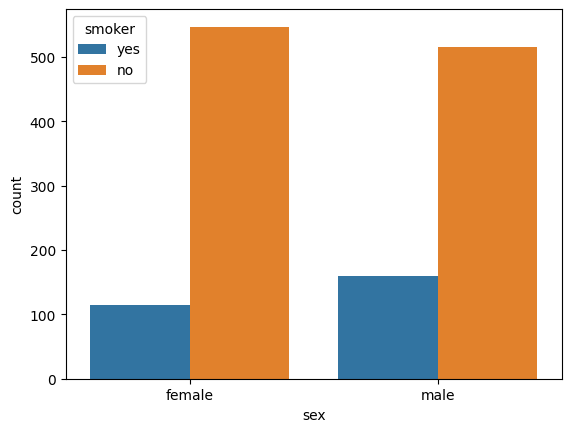

In [20]:
#Graph confirming that men smoke more than women
sns.countplot(data=df, x="sex", hue="smoker")

## Do different regions have different charges, on average?

**Null Hypothesis:** On average, all regions have the same charges.

**Alternative Hypothesis:** On average, the regions have different charges.

**Alpha:** We will be using an alpha= 0.05

**Normality Assumption:** The overall number of data point is much higher than 20 so normality is assumed and therefore normality test will not be performed.

**Test choice:** The target column is numerical and we have multiple (4) samples. I'll use Tukey's Pairwise Multiple Comparisons Test

In [21]:
## save the values as charges and the labels for the regions
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


**Conclusion:** The resulting p-values are much higher than the alpha value of 0.05 except between the southeast and the southwest region. Therefore the null hypothesis is rejected in these cases minus the exception. We can conclude that on average all regions do not have different charges with the exception of a difference between the southeast and the southwest region.

<AxesSubplot:xlabel='region', ylabel='charges'>

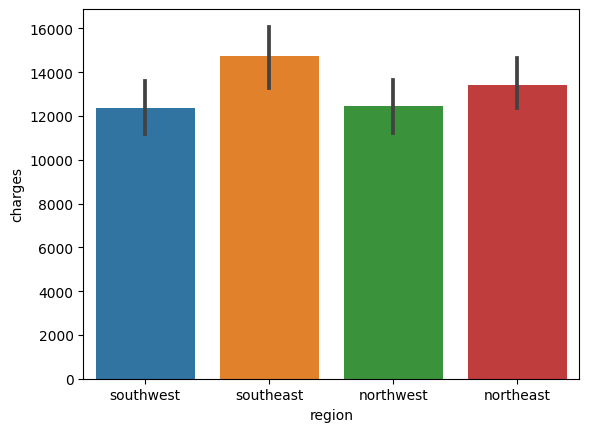

In [22]:
#Graph showing the average charges per region
sns.barplot(data=df, x='region', y='charges')